In [ ]:
import cv2
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
red_data = os.listdir("/content/drive/MyDrive/neiron lab/lab4/test/red")
rose_data = os.listdir("/content/drive/MyDrive/neiron lab/lab4/test/rose")
white_data = os.listdir("/content/drive/MyDrive/neiron lab/lab4/test/white")
print(red_data[:10])
print(rose_data[:10])
print(white_data[:10])

['1000-0.jpg', '1005.jpg', '1042.jpg', '1017.jpg', '1472-1.jpg', '1284.jpg', '1414.jpg', '1221.jpg', '1548.jpg', '1260.jpg']
['1029.jpg', '1039.jpg', '1044.jpg', '1206.jpg', '10.jpg', '1036.jpg', '1202.jpg', '1224.jpg', '120.jpg', '105.jpg']
['1136.jpg', '1640.jpg', '1200.jpg', '1450.jpg', '1379.jpg', '1654.jpg', '1107.jpg', '1336.jpg', '1166.jpg', '148.jpg']


In [ ]:
def show_img(path, img_data, count, title_name):
  plt.figure(figsize = (12, 12))
  for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread(path + img_data[i + count], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title_name)
    plt.tight_layout
  plt.show()

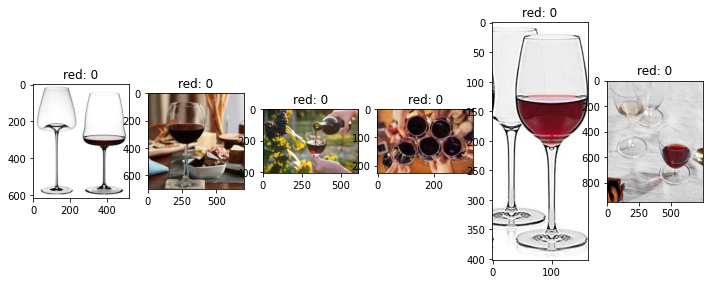

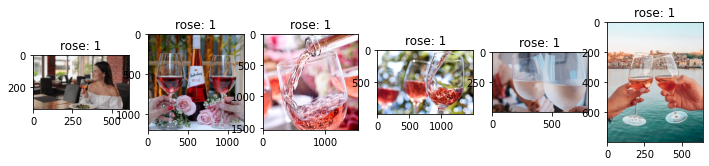

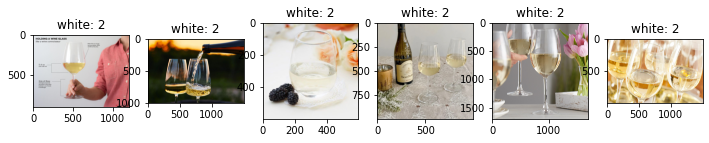

In [ ]:
show_img("/content/drive/MyDrive/neiron lab/lab4/test/red/", red_data, 0, "red: 0")
show_img("/content/drive/MyDrive/neiron lab/lab4/test/rose/", rose_data, 0, "rose: 1")
show_img("/content/drive/MyDrive/neiron lab/lab4/test/white/", white_data, 0, "white: 2")

In [ ]:
def add_img(data, labels, count, images, path, app):
  for img in red_data:
  if count == 150:
    count = 0
    break
  img_read = cv2.imread(images + img)
  img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_read, (64, 64))
  data.append(img_resize)
  labels.append(0)
  count+=1
  if count % 50 == 0:
    print(count)
  return data, labels, count

In [ ]:
data = []
labels = []
count = 0

data, labels, count = add_img(data, labels, count, red_data, "/content/drive/MyDrive/neiron lab/lab4/test/red/", 0)
data, labels, count = add_img(data, labels, count, rose_data, "/content/drive/MyDrive/neiron lab/lab4/test/rose/" , 1)
data, labels, count = add_img(data, labels, count, white_data, "/content/drive/MyDrive/neiron lab/lab4/test/white/" , 2)


print(data[0].shape)

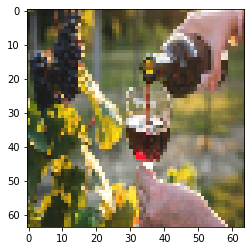

In [ ]:
plt.imshow(data[2])
plt.show()

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(data, labels, test_size = 0.2, shuffle=True, random_state = 42)

In [ ]:
x_train = np.array(x_trn, np.float32)/ 255.
x_test = np.array(x_tst, np.float32)/ 255.

y_train = np.array(y_trn)
y_test = np.array(y_tst)
#y_test = tf.one_hot(y_tst, depth=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(360, 64, 64, 3)
(360,)


In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().batch(8).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 29, 29, 32)        18464     
                                                                 
 dense_18 (Dense)            (None, 29, 29, 32)        1056      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 32)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
12/12 [==============================] - 7s 406ms/step - loss: 1.0979 - accuracy: 0.3861 - val_loss: 1.0743 - val_accuracy: 0.3444
Epoch 2/10
12/12 [==============================] - 3s 236ms/step - loss: 0.9940 - accuracy: 0.5111 - val_loss: 0.8951 - val_accuracy: 0.5444
Epoch 3/10
12/12 [==============================] - 3s 263ms/step - loss: 0.8750 - accuracy: 0.5750 - val_loss: 0.8079 - val_accuracy: 0.6667
Epoch 4/10
12/12 [==============================] - 3s 262ms/step - loss: 0.7613 - accuracy: 0.6972 - val_loss: 0.9901 - val_accuracy: 0.5444
Epoch 5/10
12/12 [==============================] - 5s 385ms/step - loss: 0.6535 - accuracy: 0.7361 - val_loss: 0.7617 - val_accuracy: 0.6444
Epoch 6/10
12/12 [==============================] - 3s 262ms/step - loss: 0.5511 - accuracy: 0.7917 - val_loss: 0.6065 - val_accuracy: 0.7222
Epoch 7/10
12/12 [==============================] - 3s 240ms/step - loss: 0.4807 - accuracy: 0.8083 - val_loss: 0.5430 - val_accuracy: 0.7667
Epoch 

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 flatten_10 (Flatten)        (None, 4608)             

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
12/12 [==============================] - 3s 276ms/step - loss: 0.2239 - accuracy: 0.9250 - val_loss: 0.5925 - val_accuracy: 0.7667
Epoch 2/10
12/12 [==============================] - 5s 456ms/step - loss: 0.1432 - accuracy: 0.9611 - val_loss: 0.6996 - val_accuracy: 0.7444
Epoch 3/10
12/12 [==============================] - 4s 342ms/step - loss: 0.0837 - accuracy: 0.9806 - val_loss: 0.8442 - val_accuracy: 0.7000
Epoch 4/10
12/12 [==============================] - 4s 313ms/step - loss: 0.0589 - accuracy: 0.9917 - val_loss: 0.8977 - val_accuracy: 0.7444
Epoch 5/10
12/12 [==============================] - 6s 485ms/step - loss: 0.0357 - accuracy: 0.9972 - val_loss: 1.0069 - val_accuracy: 0.7333
Epoch 6/10
12/12 [==============================] - 6s 461ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 1.1470 - val_accuracy: 0.7111
Epoch 7/10
12/12 [==============================] - 9s 752ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.0782 - val_accuracy: 0.7444
Epoch 

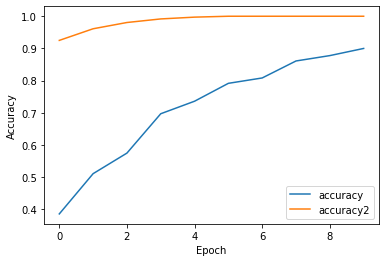

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history2.history['accuracy'], label='accuracy2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

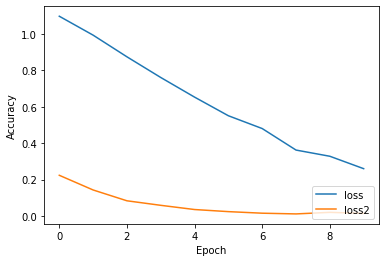

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history2.history['loss'], label='loss2')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)